In [2]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('../data/dataset.csv')
df = df.drop(columns=['Unnamed: 0'])
df.shape

(114000, 20)

In [11]:
df.tail()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,5,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,0,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,0,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,7,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,world-music
113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,1,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,world-music


In [12]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
cat = df[['track_id', 'artists', 'album_name', 'track_name', 'explicit', 'track_genre']]
for col in cat.columns:
    print(f"\n--- {col} ---")
    print(cat[col].value_counts())



--- track_id ---
track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2Ey6v4Sekh3Z0RUSISRosD    8
2kkvB3RNRzwjFdGhaUA0tz    8
5ZsAhuQ24mWHiduaxJqnhW    7
08kTa3SL9sV6Iy8KLKtGql    7
                         ..
0kJ7eKX6aWl8X1W5Xrosn6    1
4bYH5445Bn2w9UiGM0NxQw    1
1T5C6ENvpM3IiYeezsK9uI    1
34SatKRJgtXfL0bcgk7HMA    1
2hETkH7cOfqmz3LqZDHZf5    1
Name: count, Length: 89741, dtype: int64

--- artists ---
artists
The Beatles                                                                 279
George Jones                                                                271
Stevie Wonder                                                               236
Linkin Park                                                                 224
Ella Fitzgerald                                                             222
                                                                           ... 
Automatic Tasty                                                               1
o9                                     

In [4]:
df.duplicated().sum() # there are 450 duplicated rows
df[df.duplicated(keep=False)]
df1 = df.drop_duplicates()

In [ ]:
num = df1.drop(columns=['track_id', 'artists', 'album_name', 'track_name', 'explicit', 'track_genre'])
num.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113550.000000,1.135500e+05,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000
mean,33.324139,2.280794e+05,0.567031,0.642090,5.309467,-8.243419,0.637860,0.084674,0.314067,0.155702,0.213611,0.474207,122.175888,3.904218
std,22.283976,1.064148e+05,0.173408,0.251052,3.560134,5.011401,0.480621,0.105761,0.331907,0.309216,0.190461,0.259204,29.972861,0.432115
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.741802e+05,0.456000,0.473000,2.000000,-9.997750,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296500,4.000000
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000
75%,50.000000,2.615878e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048675,0.273000,0.683000,140.073750,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


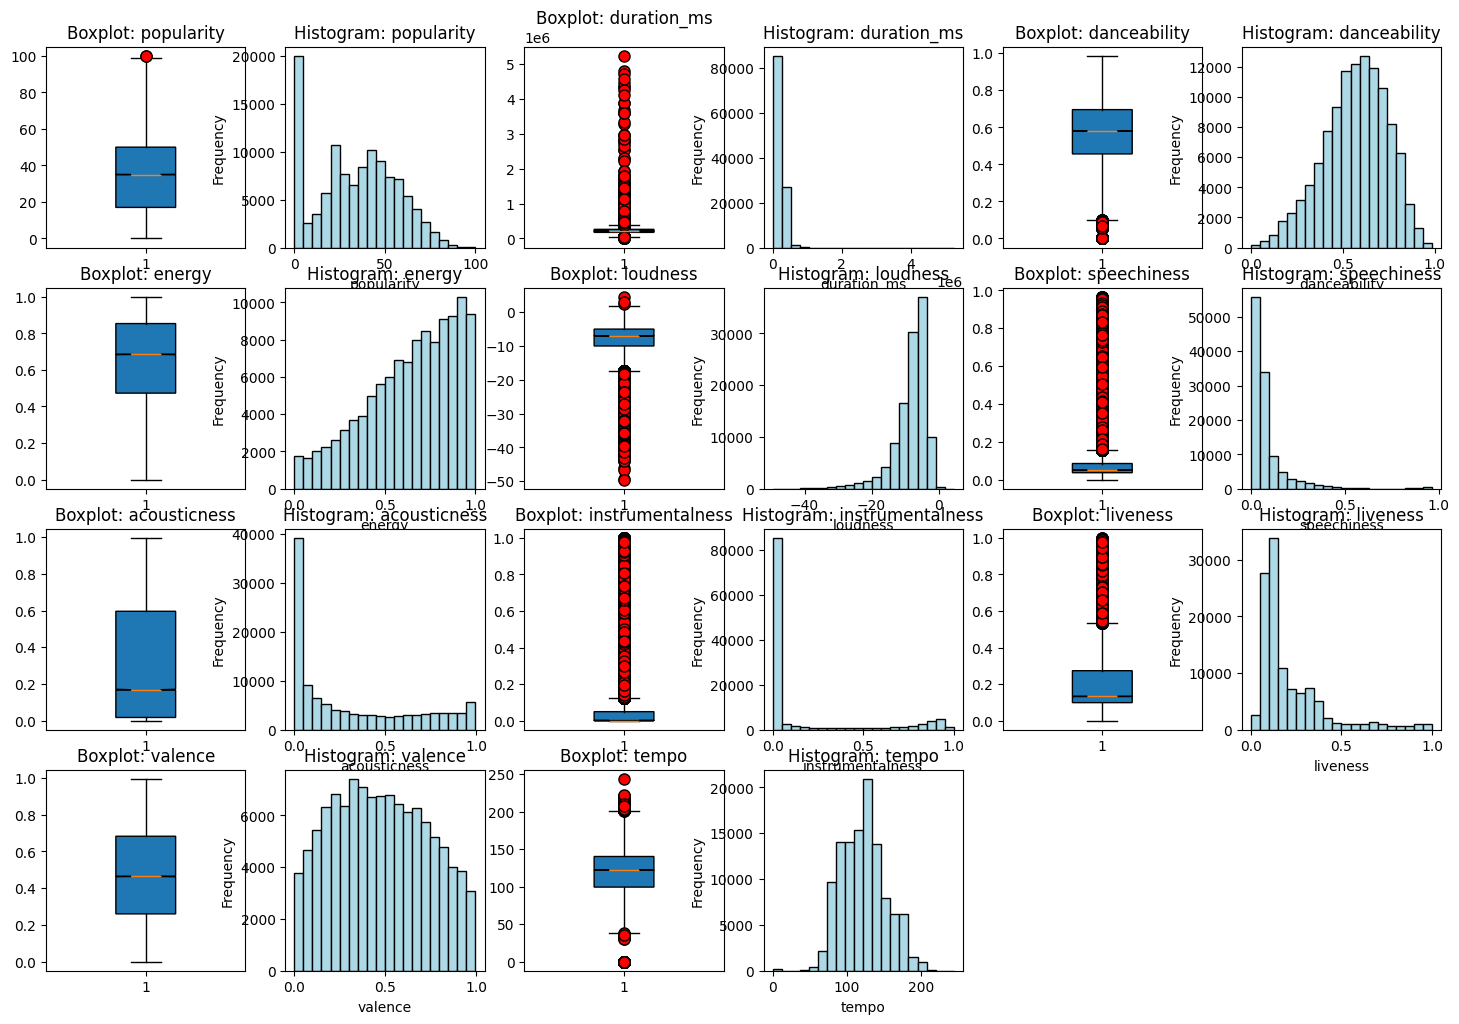

In [ ]:
nump = num.drop(columns=['key', 'time_signature', 'mode'])
cols = nump.columns
n = len(cols)
n_plots = n * 2    # 2 plots each variable
ncols = 6          # 6 plots each row
nrows = math.ceil(n_plots / ncols) 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 3, nrows * 3))
axes = axes.flatten()  # necessary to iterate axes[i]

for i, col in enumerate(cols):
    axes[i * 2].boxplot(nump[col], notch=True, patch_artist=True,
                        flierprops=dict(marker='o', markersize=8, markerfacecolor='red'),
                        widths=0.3)
    axes[i * 2].set_title(f'Boxplot: {col}')

    axes[i * 2 + 1].hist(nump[col], bins=20, color='lightblue', edgecolor='black')
    axes[i * 2 + 1].set_title(f'Histogram: {col}')
    axes[i * 2 + 1].set_xlabel(col)
    axes[i * 2 + 1].set_ylabel('Frequency')

# delete remaining axes
for j in range(n * 2, len(axes)):
    fig.delaxes(axes[j])


In [5]:
nan = df1.isnull().any(axis=1) #1
df1[nan]
df1.drop(df1[nan].index, inplace=True)  # duration is 0
df1.shape

C:\Users\elena\AppData\Local\Temp\ipykernel_17064\460195968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(df1[nan].index, inplace=True)  # duration is 0


(113549, 20)

### Column Description  
**track_id:** The Spotify ID for the track  
**artists:** The artists' names who performed the track, separated by a ;  
**album_name:** The album name in which the track appears  
**track_name:** Name of the track  
**popularity:** value between 0 and 100 (100 most popular). It is based on the total number of plays the track has had and how recent those plays are. Artist and album popularity is derived mathematically from track popularity.  
**duration_ms:** The track length in milliseconds  
**explicit:** Whether or not the track has explicit lyrics  
**danceability:** how suitable a track is for dancing based on musical elements including tempo, rhythm stability, beat strength, and overall regularity. 1.0 is most danceable  
**energy:** from 0.0 to 1.0 and represents a measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.  
**key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1  
**loudness:** The overall loudness of a track in decibels (dB)  
**mode:** Mode indicates the modality (major or minor) of a track. Major is represented by 1 and minor is 0  
**speechiness:** presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks  
**acousticness:** measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic  
**instrumentalness:** whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content  
**liveness:** presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.  
**valence:** A measure from 0.0 to 1.0 describing the musical positiveness. Tracks with high valence sound more positive, while tracks with low valence sound more negative  
**tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration  
**time_signature:** notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.  
**track_genre:** The genre in which the track belongs.

In [7]:
X = df1.drop(columns=['track_id', 'artists', 'track_genre', 'explicit', 'key', 'mode', 'time_signature'])
X.to_csv('../data/cleaned_data.csv', index=False)